In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import platform

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [3]:
from psutil import virtual_memory

ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


# Monthly

In [4]:
if platform.system() == 'Windows':
  pm10_monthly = pd.read_csv("..\\Data for model\\pm10_meteorolgical_monthly.csv")
elif platform.system() == 'Linux':
  from google.colab import drive
  drive.mount('/content/gdrive')
  pm10_monthly = pd.read_csv("/content/gdrive/Othercomputers/My Laptop (1)/jkt-aqi-forecasting/Model/Data for Model/pm10_meteorolgical_monthly.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## PM10

In [5]:
pm10_monthly

,tanggal,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
0,2010-01-31,41.9,42,4.7,5,2372.3,30,51.0,22,21.8,14,27.4,80.2,14.4,2.5
1,2010-02-28,56.2,53,6.0,7,2825.5,36,97.1,41,28.7,19,28.2,80.3,9.6,2.6
2,2010-03-31,59.3,55,8.0,9,2897.4,36,101.1,42,29.2,19,28.6,78.5,9.4,2.6
3,2010-04-30,59.5,55,12.4,13,2720.0,34,118.3,49,27.1,18,29.6,74.5,2.2,2.7
4,2010-05-31,65.2,58,16.3,16,2907.7,37,124.3,52,31.1,20,29.3,76.7,2.8,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2019-08-31,68.8,59,19.7,20,1680.0,22,143.1,60,25.3,16,28.3,68.8,0.0,1.4
116,2019-09-30,64.3,57,21.6,21,1523.2,20,140.4,59,22.5,15,28.8,68.9,0.0,1.2
117,2019-10-31,73.4,62,21.6,21,1540.0,20,159.5,67,23.6,15,29.5,70.0,0.0,1.2
118,2019-11-30,65.6,58,23.5,23,1363.2,18,162.7,69,24.0,16,29.5,70.8,2.0,1.3


In [6]:
pm10_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tanggal                         120 non-null    object 
 1   pm10(ug/m3)                     120 non-null    float64
 2   pm10_ispu                       120 non-null    int64  
 3   so2(ug/m3)                      120 non-null    float64
 4   so2_ispu                        120 non-null    int64  
 5   co(ug/m3)                       120 non-null    float64
 6   co_ispu                         120 non-null    int64  
 7   o3(ug/m3)                       120 non-null    float64
 8   o3_ispu                         120 non-null    int64  
 9   no2(ug/m3)                      120 non-null    float64
 10  no2_ispu                        120 non-null    int64  
 11  temperatur_rata-rata(°C)        120 non-null    float64
 12  kelembapan_rata-rata(%)         120 

In [7]:
pm10_monthly['tanggal'] = pd.to_datetime(pm10_monthly['tanggal'], dayfirst=True)
pm10_monthly.set_index('tanggal', inplace=True)

In [8]:
pm10_monthly.describe()

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,59.696667,53.766667,17.369167,17.350000,2140.963333,27.225000,123.872500,52.133333,20.342500,13.441667,28.484167,75.831667,5.907500,1.881667
std,14.937353,9.465313,9.064084,8.516568,458.311636,5.590301,40.796987,17.162071,10.281407,6.340209,0.658365,4.315148,5.617263,0.680457
min,28.400000,29.000000,1.600000,3.000000,1150.500000,15.000000,31.100000,14.000000,2.700000,3.000000,26.600000,66.300000,0.000000,0.900000
25%,50.250000,50.000000,9.000000,9.000000,1772.150000,23.000000,95.125000,40.000000,7.500000,5.750000,28.175000,72.750000,1.800000,1.300000
50%,59.450000,55.000000,16.850000,17.000000,2168.800000,27.500000,126.200000,52.500000,24.050000,16.000000,28.600000,76.300000,5.050000,1.600000
75%,70.500000,60.250000,23.075000,23.000000,2529.600000,32.000000,156.550000,66.000000,28.925000,19.000000,28.900000,78.600000,8.525000,2.600000
max,103.200000,77.000000,40.800000,39.000000,3062.400000,39.000000,203.900000,86.000000,37.500000,24.000000,29.900000,84.800000,33.000000,3.300000


In [9]:
pm10_monthly.corr(method='spearman')

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
pm10(ug/m3),1.000000,0.998846,0.073242,0.066274,0.217009,0.214419,0.320464,0.323119,0.506270,0.496773,0.337487,-0.365542,-0.457840,-0.117375
pm10_ispu,0.998846,1.000000,0.077028,0.070341,0.217985,0.215218,0.318720,0.321275,0.500334,0.491054,0.337593,-0.359719,-0.450833,-0.118786
so2(ug/m3),0.073242,0.077028,1.000000,0.998928,-0.111072,-0.105254,-0.053265,-0.049911,-0.151968,-0.145419,0.141579,-0.234168,-0.149000,-0.087005
so2_ispu,0.066274,0.070341,0.998928,1.000000,-0.105754,-0.099560,-0.061366,-0.058153,-0.151439,-0.145055,0.137976,-0.227800,-0.139096,-0.082798
co(ug/m3),0.217009,0.217985,-0.111072,-0.105754,1.000000,0.998476,0.213741,0.212842,0.474615,0.480847,-0.105411,0.360797,0.340931,0.460545
co_ispu,0.214419,0.215218,-0.105254,-0.099560,0.998476,1.000000,0.210402,0.209816,0.473710,0.480386,-0.107821,0.362407,0.341291,0.457511
o3(ug/m3),0.320464,0.318720,-0.053265,-0.061366,0.213741,0.210402,1.000000,0.999715,0.457211,0.452113,0.314346,-0.331460,-0.274015,0.319836
o3_ispu,0.323119,0.321275,-0.049911,-0.058153,0.212842,0.209816,0.999715,1.000000,0.458917,0.454162,0.314866,-0.331565,-0.275958,0.316290
no2(ug/m3),0.506270,0.500334,-0.151968,-0.151439,0.474615,0.473710,0.457211,0.458917,1.000000,0.995838,0.260025,-0.250964,-0.261007,0.344120
no2_ispu,0.496773,0.491054,-0.145419,-0.145055,0.480847,0.480386,0.452113,0.454162,0.995838,1.000000,0.255304,-0.240835,-0.250228,0.345154


In [10]:
pm10_monthly.drop(['pm10_ispu', 'so2(ug/m3)', 'so2_ispu', 'co_ispu', 'o3_ispu', 'no2_ispu', 'kecepatan_angin_rata-rata(m/s)'], axis=1, inplace=True)

### Visualize

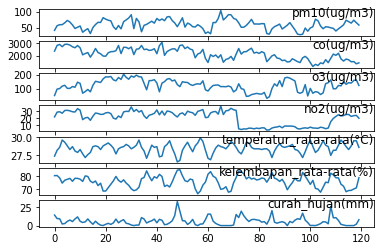

In [11]:
groups = [i for i in range(len(pm10_monthly.columns))]
i = 1
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(pm10_monthly.values[:, group])
    plt.title(pm10_monthly.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

### Sliding Window

In [12]:
WINDOW_SIZE = 12
FEATURES = pm10_monthly.shape[1]

# convert series to supervised learning
def series_to_supervised(index, data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    agg.index = index
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset
values = pm10_monthly.values
# frame as supervised learning
reframed = series_to_supervised(pm10_monthly.index, values, WINDOW_SIZE)
# drop columns we don't want to predict
reframed = reframed.iloc[:, :-1*(FEATURES-1)]
'''reframed_x.reset_index(inplace=True)
reframed_y = reframed.iloc[:, 180:-5:6]
reframed_y.reset_index(inplace=True)
reframed = reframed_x.merge(reframed_y)
reframed.set_index('tanggal', inplace=True)'''
reframed

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var7(t-12),var1(t-11),var2(t-11),var3(t-11),...,var6(t-2),var7(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
tanggal,,,,,,,,,,,,,,,,,,,,,
2011-01-31,41.9,2372.3,51.0,21.8,27.4,80.2,14.4,56.2,2825.5,97.1,...,77.5,5.9,36.0,2077.2,67.8,17.8,27.7,75.8,4.3,42.2
2011-02-28,56.2,2825.5,97.1,28.7,28.2,80.3,9.6,59.3,2897.4,101.1,...,75.8,4.3,42.2,2176.7,79.6,20.4,27.2,80.0,5.1,47.0
2011-03-31,59.3,2897.4,101.1,29.2,28.6,78.5,9.4,59.5,2720.0,118.3,...,80.0,5.1,47.0,2256.0,94.6,21.1,27.6,79.6,9.1,31.9
2011-04-30,59.5,2720.0,118.3,27.1,29.6,74.5,2.2,65.2,2907.7,124.3,...,79.6,9.1,31.9,1889.7,77.6,16.9,27.9,76.0,5.1,50.4
2011-05-31,65.2,2907.7,124.3,31.1,29.3,76.7,2.8,72.6,2916.0,102.4,...,76.0,5.1,50.4,2186.7,123.9,22.8,28.7,74.8,1.8,59.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,71.7,1229.3,74.8,5.3,28.2,69.9,1.1,55.3,1440.0,58.3,...,72.1,0.8,73.2,1741.5,131.7,25.3,28.7,67.9,0.0,68.8
2019-09-30,55.3,1440.0,58.3,6.9,28.8,67.5,2.7,46.9,1373.3,69.8,...,67.9,0.0,68.8,1680.0,143.1,25.3,28.3,68.8,0.0,64.3
2019-10-31,46.9,1373.3,69.8,6.2,29.5,71.3,5.3,53.0,1691.4,136.2,...,68.8,0.0,64.3,1523.2,140.4,22.5,28.8,68.9,0.0,73.4


In [13]:
from sklearn.preprocessing import MinMaxScaler

# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
reframed = pd.DataFrame(scaler.fit_transform(reframed), index=reframed.index, columns=reframed.columns)
reframed

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var7(t-12),var1(t-11),var2(t-11),var3(t-11),...,var6(t-2),var7(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
tanggal,,,,,,,,,,,,,,,,,,,,,
2011-01-31,0.180481,0.639050,0.115162,0.548851,0.242424,0.751351,0.436364,0.371658,0.876092,0.381944,...,0.605405,0.178788,0.101604,0.484701,0.212384,0.433908,0.333333,0.513514,0.130303,0.184492
2011-02-28,0.371658,0.876092,0.381944,0.747126,0.484848,0.756757,0.290909,0.413102,0.913698,0.405093,...,0.513514,0.130303,0.184492,0.536744,0.280671,0.508621,0.181818,0.740541,0.154545,0.248663
2011-03-31,0.413102,0.913698,0.405093,0.761494,0.606061,0.659459,0.284848,0.415775,0.820911,0.504630,...,0.740541,0.154545,0.248663,0.578221,0.367477,0.528736,0.303030,0.718919,0.275758,0.046791
2011-04-30,0.415775,0.820911,0.504630,0.701149,0.909091,0.443243,0.066667,0.491979,0.919086,0.539352,...,0.718919,0.275758,0.046791,0.386631,0.269097,0.408046,0.393939,0.524324,0.154545,0.294118
2011-05-31,0.491979,0.919086,0.539352,0.816092,0.818182,0.562162,0.084848,0.590909,0.923427,0.412616,...,0.524324,0.154545,0.294118,0.541974,0.537037,0.577586,0.636364,0.459459,0.054545,0.419786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,0.578877,0.041216,0.252894,0.074713,0.484848,0.194595,0.033333,0.359626,0.151420,0.157407,...,0.313514,0.024242,0.598930,0.309117,0.582176,0.649425,0.636364,0.086486,0.000000,0.540107
2019-09-30,0.359626,0.151420,0.157407,0.120690,0.666667,0.064865,0.081818,0.247326,0.116533,0.223958,...,0.086486,0.000000,0.540107,0.276950,0.648148,0.649425,0.515152,0.135135,0.000000,0.479947
2019-10-31,0.247326,0.116533,0.223958,0.100575,0.878788,0.270270,0.160606,0.328877,0.282912,0.608218,...,0.135135,0.000000,0.479947,0.194937,0.632523,0.568966,0.666667,0.140541,0.000000,0.601604


In [14]:
from datetime import datetime

train_end = datetime.strptime('2018-12-31', '%Y-%m-%d')
test_start = datetime.strptime('2019-01-01', '%Y-%m-%d')
test_end = datetime.strptime('2019-12-31', '%Y-%m-%d')

train = reframed.loc[:train_end].values
test = reframed.loc[test_start:test_end].values
train_X, train_y = train[:, :-1], train[:, -1:]
test_X, test_y = test[:, :-1], test[:, -1:]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(96, 84) (96, 1) (12, 84) (12, 1)


In [15]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], WINDOW_SIZE, FEATURES))
# val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], WINDOW_SIZE, FEATURES))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(96, 12, 7) (96, 1) (12, 12, 7) (12, 1)


In [16]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.layers import LSTM
from tensorflow.keras.losses import Huber
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import keras_tuner as kt

'''# design network
model = Sequential()
model.add(InputLayer((train_X.shape[1], train_X.shape[2])))
model.add(LSTM(6))
model.add(Dense(1))
model.compile(loss=Huber(), optimizer=Adam(learning_rate=0.001), metrics=RootMeanSquaredError())
# fit network
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=24)
history = model.fit(train_X, train_y, epochs=175, batch_size=24, validation_data=(val_X, val_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()'''
def call_existing_code(units, activation, dropout, dropout_rate, lr):
    model = Sequential()
    model.add(InputLayer((train_X.shape[1], train_X.shape[2])))
    model.add(LSTM(units=units))
    if dropout:
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(1, activation=activation))
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss=Huber(),
        metrics=RootMeanSquaredError(),
    )
    return model


def build_model(hp):
    units = hp.Int("units", min_value=10, max_value=100, step=10)
    activation = hp.Choice("activation", ["relu", "tanh", "linear"])
    dropout = hp.Boolean("dropout")
    dropout_rate = hp.Float("dropout_1", min_value=0.1, max_value=0.2, step=0.1)
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, default=1e-3)
    # call existing model-building code with the hyperparameter values.
    model = call_existing_code(
        units=units, activation=activation, dropout=dropout, dropout_rate=dropout_rate, lr=lr
    )
    return model


build_model(kt.HyperParameters())

In [18]:
class MyTuner(kt.tuners.RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        # You can add additional HyperParameters for preprocessing and custom training loops
        # via overriding `run_trial`
        kwargs['batch_size'] = trial.hyperparameters.Int('batch_size', min_value=1, max_value=60, step=1)
        kwargs['epochs'] = trial.hyperparameters.Int('epochs', min_value=1, max_value=500, step=1)
        return super(MyTuner, self).run_trial(trial, *args, **kwargs)

if platform.system() == 'Windows':
  tuner = MyTuner(
    hypermodel=build_model,
    objective=kt.Objective("val_root_mean_squared_error", direction="min"),
    max_trials=100,
    executions_per_trial=1,
    overwrite=False,
    directory="D:\\From External Drive\\Kuliah\\Tugas Akhir\\undergraduate-thesis_2.0\\data-and-model\\Model",
    project_name="lstm_pm10_monthly_80-20_result"
  )
elif platform.system() == 'Linux':
  tuner = MyTuner(
    hypermodel=build_model,
    objective=kt.Objective("val_root_mean_squared_error", direction="min"),
    max_trials=100,
    executions_per_trial=1,
    overwrite=False,
    directory="/content/gdrive/Othercomputers/My Laptop (1)/undergraduate-thesis_2.0/data-and-model/Model",
    project_name="lstm_pm10_monthly_80-20_result"
  )

if platform.system() == 'Windows':
  tuner.search(x=train_X, y=train_y, validation_data=(test_X, test_y), shuffle=False, callbacks=[TensorBoard("D:\\From External Drive\\Kuliah\\Tugas Akhir\\undergraduate-thesis_2.0\\data-and-model\\Model\\lstm_pm10_monthly_80-20_log")])
elif platform.system() == 'Linux':
  tuner.search(x=train_X, y=train_y, validation_data=(test_X, test_y), shuffle=False, callbacks=[TensorBoard("/content/gdrive/Othercomputers/My Laptop (1)/undergraduate-thesis_2.0/data-and-model/Model/lstm_pm10_monthly_80-20_log")])

In [20]:
tuner.results_summary()

Results summary
Results in /content/gdrive/Othercomputers/My Laptop (1)/undergraduate-thesis_2.0/data-and-model/Model/lstm_pm10_monthly_80-20_result
Showing 10 best trials
Trial summary
Hyperparameters:
units: 70
activation: linear
dropout: True
dropout_1: 0.1
lr: 0.004156914523069266
batch_size: 41
epochs: 230
Score: 0.09941400587558746
Trial summary
Hyperparameters:
units: 60
activation: tanh
dropout: False
dropout_1: 0.2
lr: 0.0013628925566693262
batch_size: 38
epochs: 338
Score: 0.10131149739027023
Trial summary
Hyperparameters:
units: 50
activation: tanh
dropout: False
dropout_1: 0.2
lr: 0.000589982746023961
batch_size: 8
epochs: 457
Score: 0.10347462445497513
Trial summary
Hyperparameters:
units: 70
activation: relu
dropout: False
dropout_1: 0.2
lr: 0.0022358066284153626
batch_size: 3
epochs: 273
Score: 0.10476972162723541
Trial summary
Hyperparameters:
units: 30
activation: relu
dropout: False
dropout_1: 0.2
lr: 0.00691691826103417
batch_size: 32
epochs: 452
Score: 0.10664907842

In [21]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.build(input_shape=((train_X.shape[1], train_X.shape[2])))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 70)                21840     
                                                                 
 dropout (Dropout)           (None, 70)                0         
                                                                 
 dense (Dense)               (None, 1)                 71        
                                                                 
Total params: 21,911
Trainable params: 21,911
Non-trainable params: 0
_________________________________________________________________


In [22]:
best_model.evaluate(test_X, test_y)

1/1 [==============================] - 1s 1s/step - loss: 0.0029 - root_mean_squared_error: 0.0767


[0.0029424577951431274, 0.0767132043838501]

In [ ]:
best_model.fit(x=train_X, y=train_y, validation_data=(test_X, test_y), epochs=1, batch_size=41, shuffle=False)

In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
  
yhat = best_model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1]*train_X.shape[2]))

inv_yhat = np.concatenate((yhat, train_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

train_y = train_y.reshape((len(train_y), 1))
inv_y = np.concatenate((train_y, train_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

rmse = mean_squared_error(inv_y, inv_yhat, squared=False)

print(f'Train RMSE: {rmse:.3f}')
print(f'Train MAPE: {mape(inv_y, inv_yhat):.3f}%')

3/3 [==============================] - 1s 8ms/step
Train RMSE: 9.099
Train MAPE: 13.184%


In [24]:
train_result = pd.DataFrame({'train_actual': inv_y, 'train_pred': inv_yhat}, index=reframed.loc[:train_end].index)
train_result

,train_actual,train_pred
tanggal,,
2011-01-31,42.2,43.413044
2011-02-28,47.0,44.821228
2011-03-31,31.9,51.216034
2011-04-30,50.4,53.395752
2011-05-31,59.8,57.154398
...,...,...
2018-08-31,71.7,64.663904
2018-09-30,55.3,65.016875
2018-10-31,46.9,61.427268


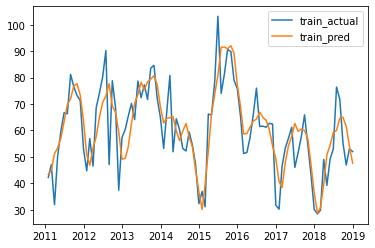

In [25]:
plt.plot(train_result['train_actual'], label='train_actual')
plt.plot(train_result['train_pred'], label='train_pred')
plt.legend()
plt.show()

In [26]:
# make a prediction
yhat = best_model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]*test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = mean_squared_error(inv_y, inv_yhat, squared=False)
print(f'Test RMSE: {round(rmse, 2)}')
print(f'Test MAPE: {mape(inv_y, inv_yhat):.3f}%')

1/1 [==============================] - 1s 1s/step
Test RMSE: 5.74
Test MAPE: 9.380%


In [27]:
result = pd.DataFrame({'actual': inv_y, 'pred': inv_yhat}, index=reframed.loc[test_start:test_end].index)

In [28]:
rmse_each_month = []
for index, value in result.iterrows():
    rmse_each_month.append(round(mean_squared_error([value['actual']], [value['pred']], squared=False), 2))
result['rmse'] = rmse_each_month

In [29]:
mape_each_month = []
for index, value in result.iterrows():
    mape_each_month.append(f"{round(mape([value['actual']], [value['pred']]), 2)}%")
result['mape'] = mape_each_month

In [30]:
result

,actual,pred,rmse,mape
tanggal,,,,
2019-01-31,49.8,42.343930,7.46,14.97%
2019-02-28,47.9,44.281812,3.62,7.55%
2019-03-31,39.8,49.318456,9.52,23.92%
2019-04-30,46.5,53.486668,6.99,15.03%
2019-05-31,52.5,59.117158,6.62,12.6%
2019-06-30,58.9,62.484936,3.58,6.09%
2019-07-31,73.2,66.517588,6.68,9.13%
2019-08-31,68.8,70.205354,1.41,2.04%
2019-09-30,64.3,69.722021,5.42,8.43%


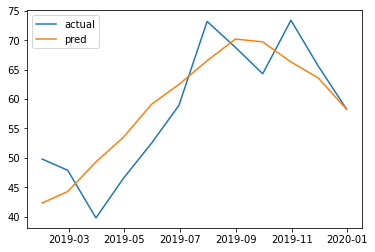

In [31]:
plt.plot(result['actual'], label='actual')
plt.plot(result['pred'], label='pred')
plt.legend()
plt.show()